In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.Read Data

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston= load_boston()

X= boston.data     ## X values
y= boston.target    ## y values 

In [4]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [5]:
##print(boston.DESCR)

In [6]:
df= pd.DataFrame(X)
df.columns=boston.feature_names

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 2.Normalization

In [9]:
## check the mean values of each feature as it is not normalized 
## we have to make it normalized
## each feature have 0 mean and 1 variance
u=np.mean(X,axis=0)
std=np.std(X,axis=0)
print(u.shape,std.shape)

(13,) (13,)


In [10]:
X=(X-u)/std

In [11]:
pd.DataFrame(X[:5,])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [12]:
u=np.mean(y,axis=0)
std=np.std(y,axis=0)

In [13]:
y=(y-u)/std

In [14]:
pd.DataFrame(y[:5,])

,0
0,0.159686
1,-0.101524
2,1.324247
3,1.182758
4,1.487503


## 3.Multiple Linear Regression

In [15]:
def hypothesis(X,theta):
    
    return np.dot(X,theta)

In [16]:
def error(X,y,theta):
    e= 0.0
    
    m= X.shape[0]
    
    y_= hypothesis(X,theta)
    
    e= np.sum((y - y_)**2)
    
    return e/m

In [17]:
def gradient(X,y,theta):
    
    y_= hypothesis(X,theta)
    
    grad= np.dot(X.T,(y_ - y))
    
    m= X.shape[0]
    
    return grad/m
    

In [18]:
def gradient_descent(X,y,lr=0.1,max_iter=300):
    
    n= X.shape[1]
    
    theta=np.zeros((n,))
    
    error_list= []
    
    for i in range(max_iter):
        
        e= error(X,y,theta)
        
        error_list.append(e)
        
        grad= gradient(X,y,theta)
        
        theta= theta - lr*grad
        
    return theta,error_list

## 4.Model Training

In [19]:
theta,error_list= gradient_descent(X,y)

In [20]:
theta

array([-9.82902217e-02,  1.12990308e-01,  1.67041241e-03,  7.61377929e-02,
       -2.19962362e-01,  2.93876729e-01, -2.10149097e-04, -3.37651771e-01,
        2.55065802e-01, -1.87234728e-01, -2.22697145e-01,  9.22773850e-02,
       -4.06061223e-01])

<function matplotlib.pyplot.show(close=None, block=None)>

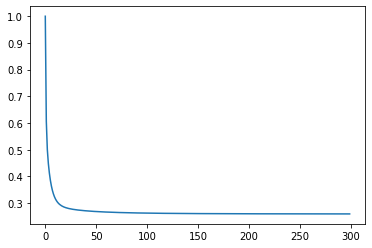

In [21]:
plt.plot(error_list)
plt.show

## 5.Test Data

In [22]:
y_= hypothesis(X,theta)

## 6.Evaluation

In [23]:
from sklearn.metrics import r2_score
r2_score(y_,y)*100

64.83245146438827